# Summary of Outputs

Written by: Eden McEwen <br>
April 26, 2021

This document was created to demonstrate the different outputs this project has generated. It is not suited as a guide for running the code, but more to navigate the returned products. 

In [41]:
# imports
import numpy as np
import pandas as pd
import numpy.ma as ma
import importlib
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from importlib import reload

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Project code
import pipeline.code.Estimator_R as er
from pipeline.code.Correlator import *


# Paths
home_dir = "/home/emcewen/"

## Part 0: File Accessing and csvs

CSV files are generated to log all of the locations and parameters of the correlation files. This shows an example of accessing them. This is also how we access the rated data, to port over any filtering we want to do. This is where we'll start understanding outputs. 

**TODO** Autogenerate the date CSVs

In [20]:
# accessing csv full of names

df_main = pd.read_csv(home_dir+"code_dev/csv/20180526.csv") # pulling in date
rslt_df = df_main[df_main['ttsub'] == True] # filtering type of file
rslt_df = rslt_df.drop_duplicates(subset=['dataname']).sort_values(by=['dataname']) #dropping duplicate names

# display a subset
rslt_df.head()

Unnamed: 0            dataname   OBSDATE         DATETIME  \
212         212  20180526_aocb0002o  20180526  20180526-105355   
116         116  20180526_aocb0005o  20180526  20180526-105917   
428         428  20180526_aocb0008o  20180526  20180526-110241   
36           36  20180526_aocb0011o  20180526  20180526-110603   
496         496  20180526_aocb0015o  20180526  20180526-111129   

                                          infits  \
212  /home/imaka/data/20180526/ao/aocb0002o.fits   
116  /home/imaka/data/20180526/ao/aocb0005o.fits   
428  /home/imaka/data/20180526/ao/aocb0008o.fits   
36   /home/imaka/data/20180526/ao/aocb0011o.fits   
496  /home/imaka/data/20180526/ao/aocb0015o.fits   

                                               outfits  \
212  /home/emcewen/out/20180526/fits/20180526_aocb0...   
116  /home/emcewen/out/20180526/fits/20180526_aocb0...   
428  /home/emcewen/out/20180526/fits/20180526_aocb0...   
36   /home/emcewen/out/20180526/fits/20180526_aocb0...   
496  /home/emcewen/out/20180526/fits/20180526_aocb0...   

                          outdir targetfile  nwfs  tmax  ...  TSAMPLE  \
212  /home/emcewen/out/20180526/       FLD2     4   200  ...   6456.0   
116  /home/emcewen/out/20180526/       FLD2     4   200  ...   6456.0   
428  /home/emcewen/out/20180526/       FLD2     4   200  ...   6456.0   
36   /home/emcewen/out/20180526/       FLD2     4   200  ...   6456.0   
496  /home/emcewen/out/20180526/       FLD2     4   200  ...   6456.0   

      FSAMPLE  TEXP  EMGAIN          ra       dec  mag  datavalid  \
212  154.8926   2.0    3000  293.444017  7.918058  7.5       True   
116  154.8924   2.0    3000  293.444017  7.918058  7.5       True   
428  154.8925   2.0    3000  293.444017  7.918058  7.5       True   
36   154.8923   2.0    3000  293.444017  7.918058  7.5       True   
496  154.8925   2.0    3000  293.444017  7.918058  7.5       True   

                              runfile  run  
212  /home/emcewen/data/runs/RUN7.txt    7  
116  /home/emcewen/data/runs/RUN7.txt    7  
428  /home/emcewen/data/runs/RUN7.txt    7  
36   /home/emcewen/data/runs/RUN7.txt    7  
496  /home/emcewen/data/runs/RUN7.txt    7  

[5 rows x 23 columns]

In [21]:
# in fits to look at
fts = rslt_df["infits"] # pulling cov fits files
fits_in = fts.values # list of correlation fits file names
fits_in_ex = fits_in[36]
fits_in_ex

'/home/imaka/data/20180526/ao/aocb0124o.fits'

In [22]:
# picking the correlation file to work with 

fts = rslt_df["outfits"] # pulling cov fits files
fits_out = fts.values # list of correlation fits file names
fits_ex = fits_out[36]
fits_ex

'/home/emcewen/out/20180526/fits/20180526_aocb0124o_tmax200_stt.fits'

In [ ]:
# this is the example file we're working with

#TODO: plot example file
#TODO: plot example file, tt and static subtract

## Part 0: AO Circular Buffers

Where they are, and what they look like

In [43]:
# this is the information stored in an output fits:
hdr = fits.open(fits_ex)
hdr[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATANAME= '20180526_aocb0124o' / data file name                                 
DATAFILE= '/home/imaka/data/20180526/ao/aocb0124o.fits' / data file path        
OUTPATH = '/home/emcewen/out/20180526/' / out path                              
DATETIME= '20180526-145533'    / YYYYMMDD-HHMMSS data was saved (UT)            
OBSDATE = '20180526'           / YYYYMMDD data was saved (UT)                   
TARGET  = 'FLD2    '           / Target field name                              
TFILE   = '/home/emcewen/data/target_input/FLD2_USNOB_GS.txt'                   
NWFS    =                    4 / WFS used in correction                         
TMAX    =                  2

In [ ]:
## TODO: show the AOCB Plots


## Part 1: Correlation Pipeline

The outputs from running the corelation pipeline. 

In [42]:
# reloading correlation object from output fits
# this technique is used in the estimation portion of the project

cor_data = Correlator("", "", "", f_file = fits_ex)

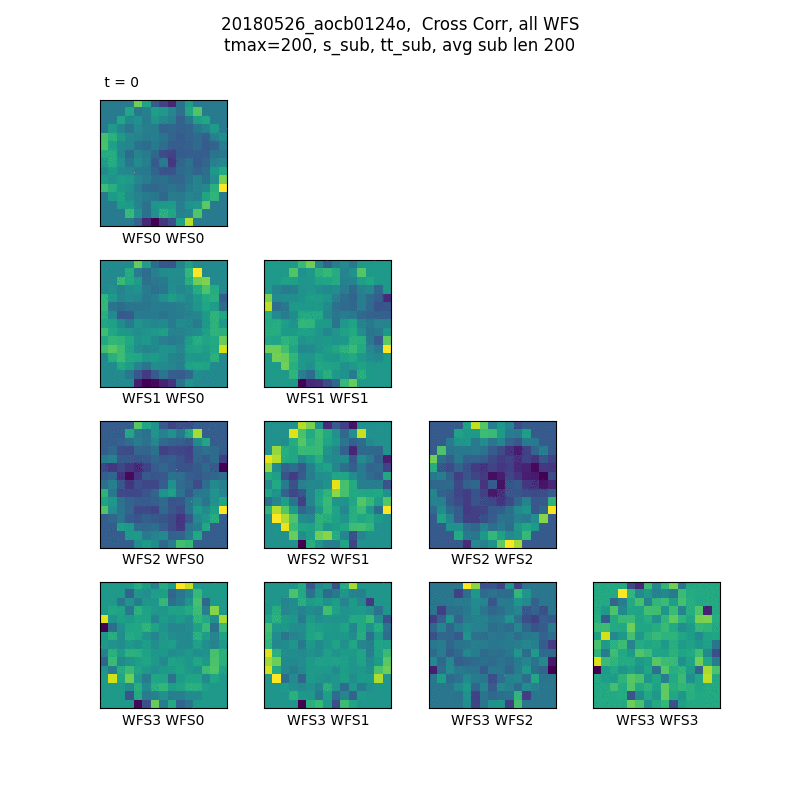

In [39]:
## TODO: automate grabbing this file

from IPython.display import Image

f = 'out/20180526/plots/ccor_all_gif/20180526_aocb0124o_stt_ccor_all_0.gif'
with open(home_dir+ f,'rb') as file:
    display(Image(file.read()))

## Part 3: Estimation Pipeline

The estimation pipeline is able to work directly from the stored correlation fits files. 

In [27]:
# Pulling Correlation 
er_pipe = er.Estimate_simple(fits_ex)
table = er_pipe.return_table(detect_clp = 4) # this runs the radial estimation

### 3.1. Detected Speeds: 
All the detections above the clp defied above

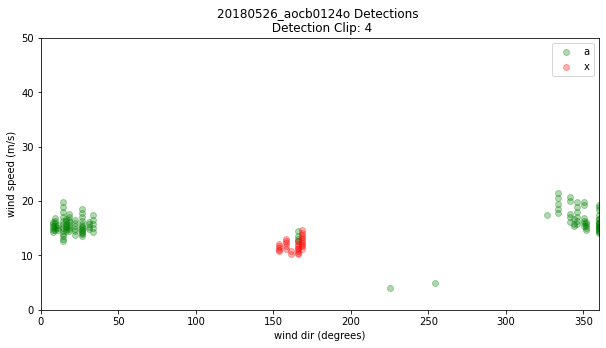

In [28]:
er_pipe.plot_spds_detect().show()

### 3.2. Detection Probabilities

Putting these probabilites onto a 2D histogram and normalizing.

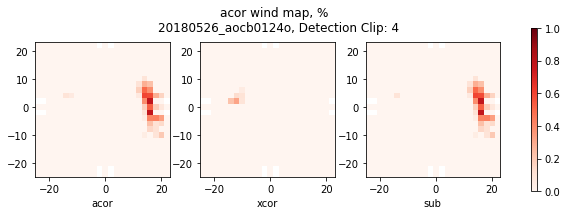

In [29]:
er_pipe.plot_prob_hist().show()

### 3.3. Estimation Clusters

We then cluster these detections to get simplied estimation of peaks and spreads.

Estimations can be further altered by:
- Method: clustering algorithm (default meanshift)
- n_filter: min number of counts per cluster to conisder the cluster
- sdv comp: The scalar on standard deviation on a cluster to conglomerate them

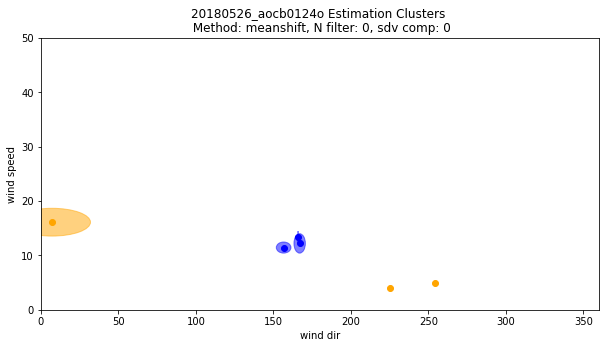

In [31]:
er_pipe.plot_clstr().show()

These plotted clusters are then saved to a txt file.  

In [33]:
table

dir    dir_std        spd   spd_std  count class  xcor  \
0    7.248621  16.530633  16.116931  1.705532  122.0    FL     0   
1  165.963757   0.000000  13.403093  0.720014    4.0    GL     0   
2  254.054604   0.000000   4.975195  0.000000    1.0    FL     0   
3  225.000000   0.000000   3.984819  0.000000    1.0    FL     0   
4  166.991671   2.456105  12.212054  1.193122   19.0    GL     1   
5  156.644978   3.156386  11.450784  0.681973   11.0    GL     1   

                 name clstr_method  detect_clp  sdv_comp  sdv_cnd  n_filter  
0  20180526_aocb0124o    meanshift           4         3        0         0  
1  20180526_aocb0124o    meanshift           4         3        0         0  
2  20180526_aocb0124o    meanshift           4         3        0         0  
3  20180526_aocb0124o    meanshift           4         3        0         0  
4  20180526_aocb0124o    meanshift           4         3        0         0  
5  20180526_aocb0124o    meanshift           4         3        0         0

## TODOS: What's left

List of things this code should still be able to do:
- return wind speed estimations with certainties,
- work with MAS-DIM data